<a href="https://colab.research.google.com/github/victorjms/visualizacion_de_datos/blob/main/Visualizacion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Victor Montenegro
## Ejercicio de visualización de datos

Makeover Monday ofrece un reto semanal de recrear o mejorar visualizaciones de datos. ¡Tu tarea es elegir uno de las visualizaciones de datos para recrear o mejorar!

Para hacer esto:

1. Elegir un conjunto de datos de la Data Sets list. Puedes elegir un conjunto de datos reciente o uno del año anterior, ¡siempre y cuando te interese!
2. Descarga los datos que elegiste.
3. Usa Python para crear una visualización informativa y placentera a la vista usando los datos que seleccionaste.

También necesitas subir tu trabajo para esta tarea a GitHub, ¡así todos pueden ver lo fabulosa que es la visualización que creaste!

Para hacer esto:

1. Crea un nuevo repositorio de GitHub con un nombre informativo para su visualización o datos. (Nota: aquí hay instrucciones de cómo hacerlo si no estás segur. Asegúrate de marcar la casilla «Inicie este repositorio con un README.»).
2. Agrega tu código al repositorio GitHub que creaste. Puedes hacerlo en Google Colab seleccionando Archivo > «Guardar una Copia en GitHub».
3. Edita el README para crear un resumen informativo de los ejercicios que explican el propósito de la tarea/visualización, los datos y qué muestra/dice la visualización que creaste. ¡También podrías querer incluir una imagen estática de tu visualización final en el README! (Nota: los README son archivos markdown. Aquí hay una hoja con soluciones de markdown syntax.) ¡Intenta hacerlo lo más informativo y profesional posible, ya que esto es lo primero que las personas verán cuando entren a tu repositorio GitHub!



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
filename = '/content/drive/My Drive/Coding Dojo/Semana 03/Tareas Core/europe_power.csv' # colocamos la ruta del archivo a importar
df = pd.read_csv(filename, sep=';') # colocamos el contenido del archivo en "df"
df # imprimimos "df"

,Year,Area,Variable,Generation (TWh),Share of production (%),Change on last year (%),Change on last year (TWh)
0,2000,Austria,Fossil,16,27.0,NaN,NaN
1,2000,Austria,Coal,6,10.0,NaN,NaN
2,2000,Austria,Hard Coal,4,7.0,NaN,NaN
3,2000,Austria,Lignite,1,2.0,NaN,NaN
4,2000,Austria,Gas,8,13.0,NaN,NaN
...,...,...,...,...,...,...,...
10705,2020,United Kingdom,Bioenergy,35,12.0,4,2.0
10706,2020,United Kingdom,Other renewables,0,0.0,0,0.0
10707,2020,United Kingdom,Production,305,NaN,-4,-14.0
10708,2020,United Kingdom,Net imports,18,NaN,-14,-3.0


In [61]:
df_g = df.groupby(['Year', 'Variable'])[['Share of production (%)']].cumsum()

In [62]:
df_g.head(20)

,Share of production (%)
0,27.0
1,10.0
2,7.0
3,2.0
4,13.0
5,5.0
6,0.0
7,73.0
8,70.0
9,0.0


In [51]:
fossil = df.loc[:, 'Variable'] == 'Fossil'
df_fossil = df.loc[fossil]
df_fossil.tail()

,Year,Area,Variable,Generation (TWh),Share of production (%),Change on last year (%),Change on last year (TWh)
10625,2020,Slovakia,Fossil,5,19.0,-1,0.0
10642,2020,Slovenia,Fossil,5,29.0,-1,0.0
10659,2020,Spain,Fossil,91,34.0,-19,-22.0
10676,2020,Sweden,Fossil,4,2.0,0,0.0
10693,2020,United Kingdom,Fossil,124,41.0,-14,-21.0


In [74]:
# agrupo por año y por participación de mercado
fossil1 = df_fossil.groupby(['Year'])['Share of production (%)'].median()
fossil1

Year
2000    59.0
2001    61.5
2002    60.5
2003    63.5
2004    61.5
2005    60.0
2006    62.0
2007    62.0
2008    59.5
2009    55.5
2010    53.0
2011    57.0
2012    55.0
2013    48.5
2014    44.5
2015    50.0
2016    44.0
2017    44.5
2018    42.0
2019    41.0
2020    37.5
Name: Share of production (%), dtype: float64

In [75]:
# Coloco en la variable fossil_tiempo la lista correspondiente a los años.
fossil_tiempo = list(fossil1.index)
fossil_tiempo

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [76]:
# Coloco los valores en la variable fossil_share
fossil_share = list(fossil1.values)
fossil_share

[59.0,
 61.5,
 60.5,
 63.5,
 61.5,
 60.0,
 62.0,
 62.0,
 59.5,
 55.5,
 53.0,
 57.0,
 55.0,
 48.5,
 44.5,
 50.0,
 44.0,
 44.5,
 42.0,
 41.0,
 37.5]

In [78]:
renewable = df.loc[:, 'Variable'] == 'Renewables'
df_renewable = df.loc[renewable]
df_renewable.head()

,Year,Area,Variable,Generation (TWh),Share of production (%),Change on last year (%),Change on last year (TWh)
7,2000,Austria,Renewables,43,73.0,NaN,NaN
24,2000,Belgium,Renewables,1,1.0,NaN,NaN
41,2000,Bulgaria,Renewables,3,6.0,NaN,NaN
58,2000,Croatia,Renewables,6,57.0,NaN,NaN
75,2000,Cyprus,Renewables,0,0.0,NaN,NaN


In [81]:
# agrupo por año y por participación de mercado
renewable1 = df_renewable.groupby(['Year'])['Share of production (%)'].median()
renewable1

Year
2000    13.5
2001    14.5
2002    10.0
2003    10.5
2004    10.5
2005    10.5
2006    12.0
2007    13.0
2008    14.0
2009    15.5
2010    18.5
2011    20.0
2012    21.0
2013    24.5
2014    25.5
2015    29.0
2016    29.0
2017    29.5
2018    32.5
2019    35.0
2020    40.0
Name: Share of production (%), dtype: float64

In [82]:
# Coloco en la variable renewable_tiempo la lista correspondiente a los años.
renewable_tiempo = list(renewable1.index)
renewable_tiempo

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [84]:
# Coloco los valores en la variable renewable_share
renewable_share = list(renewable1.values)
renewable_share

[13.5,
 14.5,
 10.0,
 10.5,
 10.5,
 10.5,
 12.0,
 13.0,
 14.0,
 15.5,
 18.5,
 20.0,
 21.0,
 24.5,
 25.5,
 29.0,
 29.0,
 29.5,
 32.5,
 35.0,
 40.0]

In [56]:
nuclear = df.loc[:, 'Variable'] == 'Nuclear'
df_nuclear = df.loc[nuclear]
df_nuclear.tail()

,Year,Area,Variable,Generation (TWh),Share of production (%),Change on last year (%),Change on last year (TWh)
10631,2020,Slovakia,Nuclear,15,54.0,0,0.0
10648,2020,Slovenia,Nuclear,6,37.0,9,1.0
10665,2020,Spain,Nuclear,58,22.0,0,0.0
10682,2020,Sweden,Nuclear,50,30.0,-25,-17.0
10699,2020,United Kingdom,Nuclear,52,17.0,-9,-5.0


In [88]:
# agrupo por año y por participación de mercado
nuclear1 = df_nuclear.groupby(['Year'])['Share of production (%)'].median()
nuclear1

Year
2000    15.0
2001    15.0
2002    16.5
2003    15.5
2004    15.0
2005    14.5
2006    14.0
2007    14.0
2008    15.5
2009    18.5
2010     9.5
2011    11.0
2012    10.0
2013     9.0
2014    10.0
2015     9.0
2016     8.0
2017     7.5
2018     7.5
2019     7.5
2020     7.0
Name: Share of production (%), dtype: float64

In [91]:
# Coloco en la variable nuclear_tiempo la lista correspondiente a los años.
nuclear_tiempo = list(nuclear1.index)
nuclear_tiempo

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [92]:
# Coloco los valores en la variable nuclear_share
nuclear_share = list(nuclear1.values)
nuclear_share

[15.0,
 15.0,
 16.5,
 15.5,
 15.0,
 14.5,
 14.0,
 14.0,
 15.5,
 18.5,
 9.5,
 11.0,
 10.0,
 9.0,
 10.0,
 9.0,
 8.0,
 7.5,
 7.5,
 7.5,
 7.0]

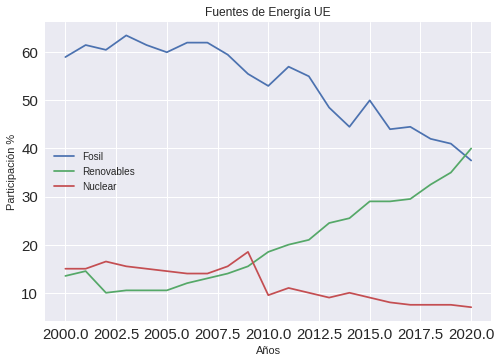

In [94]:
# Gráfico
plt.style.use('seaborn')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Años')
plt.ylabel('Participación %')
plt.title('Fuentes de Energía UE')
plt.grid(True)
plt.plot(fossil_tiempo, fossil_share, label='Fosil')
plt.plot(renewable_tiempo, renewable_share, label='Renovables')
plt.plot(nuclear_tiempo, nuclear_share, label='Nuclear')
plt.legend(loc='center left')

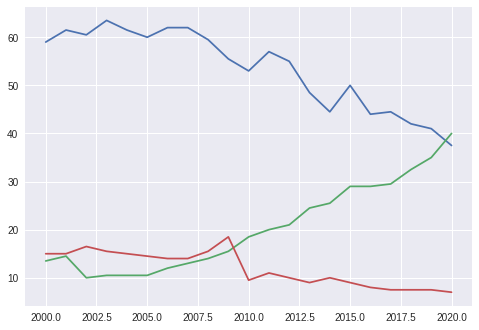

In [96]:
# Se cre la figura y los ejes con plt.subplots
fig, ax = plt.subplots()



# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(fossil_tiempo, fossil_share)

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(renewable_tiempo , renewable_share)

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(nuclear_tiempo , nuclear_share)

# Call the show function
plt.show()